# Implementing linear regression to predict Individual medical costs billed by health insurance implemntation of linear regression

In [76]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Implmentation of linear regression

In [77]:
def fit_linear_regression(X, Y, learning_rate, iterations):
    m, n = X.shape
    W = np.zeros(n)
    b = 0

    for i in range(iterations):
        Y_pred = predict_linear_regression(X, W, b)
        dW = - (2 * np.dot(X.T, Y - Y_pred)) / m
        db = - 2 * np.sum(Y - Y_pred) / m
        W -= learning_rate * dW
        b -= learning_rate * db

    return W, b


In [78]:
def predict_linear_regression(X, W, b):
    return np.dot(X, W) + b

In [97]:
# normalization function should be used instead of standard scalling
def normalize_features(X):
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0)
    normalized_X = (X - means) / stds
    return normalized_X,mean,std

In [109]:
# to cancel the effect of normalization to represent the actual data
def denormalization(normalized_x,mean_x,std_x):
    denormalized_x=(normalized_x*std_x)+mean_x.flatten()
    return denormalized_x

In [110]:
def r2_score(y, y_predict):
    mean_actual = np.mean(y)
    ssr = np.sum((y - y_predict) ** 2)
    sst = np.sum((y - mean_actual) ** 2)
    r2 = 1 - (ssr / sst)
    return r2

In [ ]:
def mean_sqrt_error(y, y_pred):
    return np.mean(np.square(y - y_pred))

# Import data

In [98]:
df=pd.read_csv("insurance.csv")

# Data Preparation

In [99]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df['region'] = df['region'].map({'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4})

In [100]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [101]:
# Normalize the input features
X = normalize_features(X)

In [102]:
# split data to train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [103]:
learning_rate = 0.001
iterations = 1000

In [104]:
W, b = fit_linear_regression(X_train, Y_train, learning_rate, iterations)
Y_pred = predict_linear_regression(X_test, W, b)

In [105]:
print("Predicted values:", np.round(Y_pred[:3], 2))
print("Real values:", Y_test[:3])
print("Trained W:", W)
print("Trained b:", b)

Predicted values: [ 9619.6   8407.11 32872.74]
Real values: [ 9724.53     8547.6913  45702.02235]
Trained W: [2986.65513648  -30.7113549  1821.75581778  544.14362341 8165.34598028
  176.98895801]
Trained b: 11431.555706959982


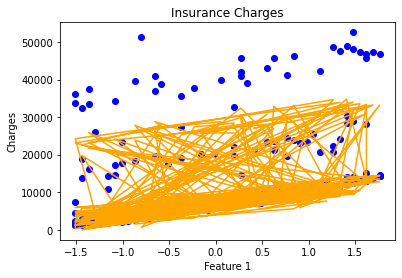

In [106]:
plt.scatter(X_test[:, 0], Y_test, color='blue')  # Plotting the first feature against the target variable
plt.plot(X_test[:, 0], Y_pred, color='orange')
plt.title('Insurance Charges')
plt.xlabel('Feature 1')
plt.ylabel('Charges')
plt.show()


In [9]:
def map_smoking(column):
    mapped=[]  
    for row in column:  
        if row=="yes":
            mapped.append(1)
        else:
            mapped.append(0)
    return mapped

In [10]:
data["smoker_norm"]=map_smoking(data["smoker"])

In [108]:
smoke = data['smoker_norm'].values
bmi = data['bmi'].values
charges = data['charges'].values

m = len(smoke)
x0 = np.ones(m)
X = np.array([x0, smoke, bmi]).T
# Initial Coefficients
B = np.array([0, 0, 0])
Y = np.array(charges)
alpha = 0.0001

KeyError: 'smoker_norm'

In [31]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [32]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost   
    return B, cost_history

In [33]:
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)
print(newB)

[ -395.60340093 18910.77133323   322.04037337]


In [34]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse


In [35]:
# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

In [36]:
Y_pred = X.dot(newB)
print(rmse(Y, Y_pred))
print(r2_score(Y, Y_pred))

7339.743946802884
0.6323814372168173


In [18]:
def calculate_insurance(smoking,bmi):
    y=(18909.62299299*smoking)+(322.12279 *bmi)-398.44255998
    return y

In [19]:
calculate_insurance()

TypeError: calculate_insurance() missing 2 required positional arguments: 'smoking' and 'bmi'